# Figures dealing with rainout hypothesis

Rich Fiorella
February 18, 2021
Updated: March 11, 2021.

In [8]:
# set up packages and data
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy
from cartopy.util import add_cyclic_point

# set plotting resolution
dpi_out = 600 # lower res for drafts, higher res for final submission
rc('font',**{'family':'sans-serif','sans-serif':['Tahoma']})
rc('text', usetex=True)

# calculate d18O_0, need to filter for things above x mm/day
thres = 0.1 # mm/day 
thres_mps = thres*(1/86400)*(1/1000) # convert mm/day -> m/s

ds = xr.open_dataset("../proc_data/iCAM6_nudg_monthly.nc", decode_timedelta = False)
ds_weighted = xr.open_dataset("../proc_data/iCAM6_nudg_WgtSeasAvg.nc", decode_timedelta = False)
ds_p1 = xr.open_dataset("../proc_data/iCAM6_nudg_AnnAvg.nc", decode_timedelta = False)
monthly_avr = xr.open_dataset('../proc_data/iCAM6_nudg_MonAvg.nc', decode_timedelta = False)
ds_ann = xr.open_dataset('../raw_data/iCAM6_nudged_annual_19801999.nc', decode_timedelta = False)

monthly_avr

<xarray.Dataset>
Dimensions:         (lon: 180, lat: 90, month: 12)
Coordinates:
  * lon             (lon) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat             (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * month           (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/30)
    PRECT           (month, lat, lon) float64 ...
    PRECT_d18O      (month, lat, lon) float64 ...
    PRECT_d18Oec    (month, lat, lon) float64 ...
    PRECT_d2H       (month, lat, lon) float64 ...
    PRECT_dxs       (month, lat, lon) float64 ...
    PRECTct         (month, lat, lon) float64 ...
    ...              ...
    qonp            (month, lat, lon) float64 ...
    PRECTedxs       (month, lat, lon) float64 ...
    dxs_diff        (month, lat, lon) float64 ...
    d18O_anom_norm  (month, lat, lon) float64 ...
    RT_anom_norm    (month, lat, lon) float64 ...
    qonp_anom_norm  (month, lat, lon) float64 ...

### Relationships between Tcond, ln(f), and d18O - "Rayleigh" framework

This section has six figures currently looking at relationships between Tcond, ln(f), and d18O to test hypotheses related to large-scale controls on precipitation d18O. Explicitly tests some hypotheses going back to the Dansgaard 1964 paper.

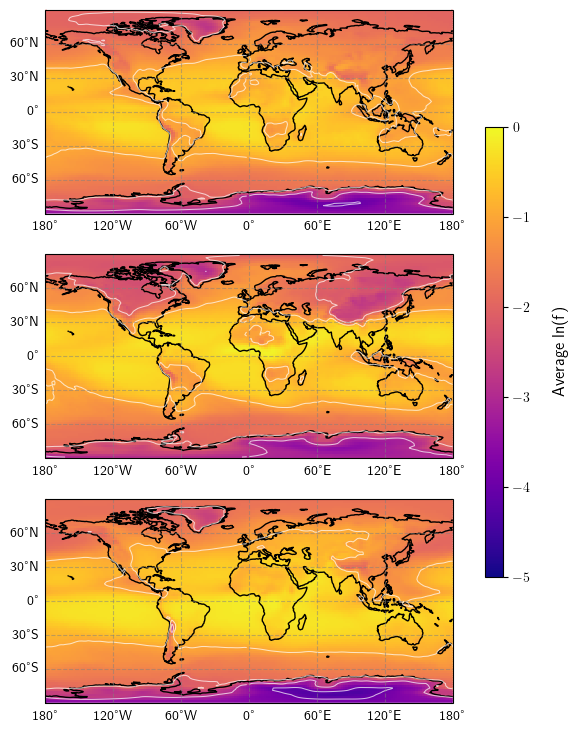

In [9]:
# Figure of ln(f): annual, DJF, and JJA

# now make the map plots:
fig = plt.figure(figsize=(9,9))

grid = gridspec.GridSpec(nrows = 3,
                        ncols = 1,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "plasma"

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid

# upper panel: annual mean
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.mean_lnf.plot(ax = ax1,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = -5,
                    vmax = 0,
                    add_colorbar = False)
ds_p1.mean_lnf.plot.contour(ax=ax1,  
                               levels = [-4, -3, -2, -1], 
                               colors = ['w','w','w', 'w'],
                               linewidths = [0.75, 0.75, 0.75, 0.75],
                               alpha = 0.7)

# middle panel: DJF
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_weighted['PRECTlnf'].sel(season='DJF').plot(ax = ax2,
                                               cmap = cmap,
                                               transform = ccrs.PlateCarree(),
                                               vmin = -5,
                                               vmax = 0,
                                               add_colorbar = False)
ds_weighted['PRECTlnf'].sel(season='DJF').plot.contour(ax=ax2,  
                               levels = [-4, -3, -2, -1], 
                               colors = ['w','w','w', 'w'],
                               linewidths = [0.75, 0.75, 0.75, 0.75],
                               alpha = 0.7)

# bottom panel: JJA
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im = ds_weighted['PRECTlnf'].sel(season='JJA').plot(ax = ax3,
                                               cmap = cmap,
                                               transform = ccrs.PlateCarree(),
                                               vmin = -5,
                                               vmax = 0, 
                                               add_colorbar = False)
ds_weighted['PRECTlnf'].sel(season='JJA').plot.contour(ax=ax3,  
                               levels = [-4, -3, -2, -1], 
                               colors = ['w','w','w', 'w'],
                               linewidths = [0.75, 0.75, 0.75, 0.75],
                               alpha = 0.7)

ax1.set_title('')
ax2.set_title('')
ax3.set_title('')

fig.subplots_adjust(right=0.95, wspace=0.02, hspace=0.2)
cb_ax = fig.add_axes([0.80, 0.25, 0.02, 0.5])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("Average ln(f)", rotation = 90, size = 'large', labelpad = 15)

#plt.tight_layout()
plt.draw()
#plt.savefig('plots/fig05.png',dpi=dpi_out,bbox_inches='tight')

/Users/rfiorella/opt/anaconda3/envs/xarray/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/rfiorella/opt/anaconda3/envs/xarray/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1734: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)


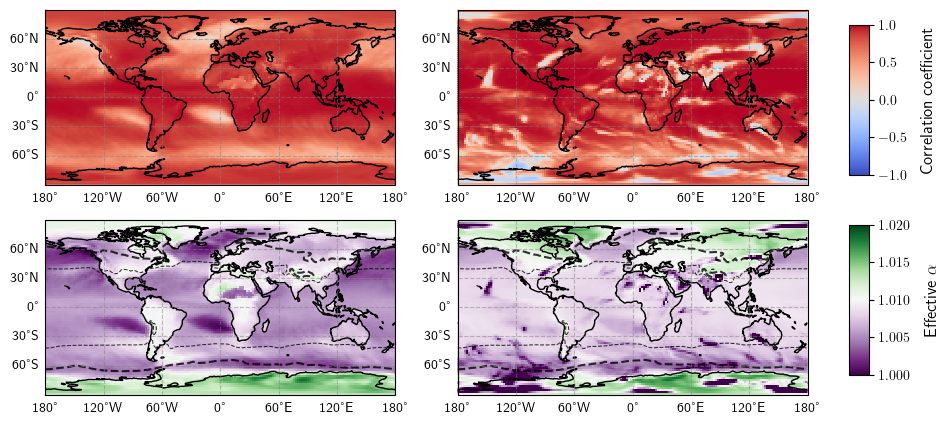

In [10]:
# Figure 5 - correlations between ln(f) and d'18O, slopes of relationship between d18O and D18O.

# now make the map plots:
fig = plt.figure(figsize=(10,5))

grid = gridspec.GridSpec(nrows = 2,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap1 = "coolwarm"
cmap2 = 'PRGn'

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper left cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # upper right cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower left cell of grid
ax4 = fig.add_subplot(grid[3], projection=proj) # lower right cell of grid

# upper panel: correlation between d'18O and ln(f)
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(ds.PRECTlnf,ds.log_d18O,dim="time").plot(ax = ax1,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1,
                                  add_colorbar = False)
#xr.corr(ds.PRECTlnf,ds.log_d18O,dim="time").plot.contour(ax=ax1,  
#                               levels = [0.5, 0.9], 
#                               colors = ['w','w'],
#                               linewidths = [0.75, 1.5],
#                               alpha = 0.9)

ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
xr.corr(ds.PRECTlnf,ds.log_D18O,dim='time').plot(ax = ax2, 
                                                 cmap = cmap1,
                                                 vmin = -1,
                                                 vmax = 1,
                                                 transform = ccrs.PlateCarree(),
                                                 add_colorbar = False)
#xr.corr(ds.PRECTlnf,ds.log_D18O,dim="time").plot.contour(ax=ax2,  
#                              levels = [0.5, 0.8], 
#                              colors = ['w','w'],
#                              linewidths = [0.75, 1.5],
#                              alpha = 0.9)


# bottom left panel: correlation between d'18O and ln(f)
# plot slope between lnf and d18O at different places
def linear_trend(x,y):
    pf = np.polyfit(x,y,1)
    # need to return a dataarray (is this neeeded?)
    return xr.DataArray(pf[0])

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds.PRECTlnf,ds.log_d18O,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)

# add 1 to slopes, since slopes are alpha - 1
slopes = slopes + 1

# average slope of d18O vs lnf
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = slopes.plot(ax=ax3,transform = ccrs.PlateCarree(),
            cmap = cmap2, 
            vmin = 1.000, vmax = 1.020,
            add_colorbar = False)
ds['TS'].mean(dim="time").plot.contour(ax=ax3,  
                               levels = [273, 288], 
                               colors = ['k','k'],
                               linewidths = [1.5, 0.75],
                               linestyles = ["--", '--'],
                               alpha = 0.8)

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds.PRECTlnf,ds.log_D18O,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)



# add 1 to slopes, since slopes are alpha - 1
slopes = slopes + 1
slopes = slopes.where(ds_p1.PRECT > thres_mps) # mm/yr

# average slope of d18O vs lnf
ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
slopes.plot(ax=ax4,transform = ccrs.PlateCarree(),
            cmap = cmap2,
            vmin = 1.000, vmax = 1.020,
            add_colorbar = False)
ds['TS'].mean(dim="time").plot.contour(ax=ax4,  
                               levels = [273, 288], 
                               colors = ['k','k'],
                               linewidths = [1.5, 0.75],
                               linestyles = ["--", '--'],
                               alpha = 0.8)

fig.subplots_adjust(right = 0.93, wspace=0.05)
cb1_ax = fig.add_axes([0.95, 0.55, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax = cb1_ax)
cbar1.set_label("Correlation coefficient", size = 'large', labelpad = 10)

cb2_ax = fig.add_axes([0.95, 0.15, 0.02, 0.3]) 
cbar2 = fig.colorbar(im2, cax = cb2_ax)
cbar2.set_label(r'Effective $\alpha$', size = 'large', labelpad = 10)

#plt.savefig('plots/fig06.png',dpi=dpi_out,bbox_inches='tight')
plt.show()

/Users/rfiorella/opt/anaconda3/envs/xarray/lib/python3.9/site-packages/matplotlib/axes/_axes.py:4928: RuntimeWarning: invalid value encountered in cast
  iy1 = np.round(iy).astype(int)
/Users/rfiorella/opt/anaconda3/envs/xarray/lib/python3.9/site-packages/matplotlib/axes/_axes.py:4930: RuntimeWarning: invalid value encountered in cast
  iy2 = np.floor(iy).astype(int)


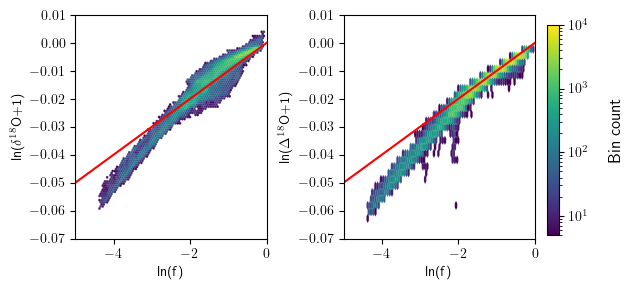

In [11]:
# Figure 4: scatter plots of ln(d18O+1) vs ln(f)
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (6,3))

# uncorrected d18O
ax1.set(xlim=(-5,0), ylim=(-0.07,0.01))
hb = ax1.hexbin('PRECTlnf', 'log_d18O',
                data = monthly_avr, mincnt = 5,
                gridsize = 75, norm=mpl.colors.LogNorm(5,10000), linewidths = 0.1)
# add constant fractionation line
ax1.plot([-5,0],[-0.05,0],'-',color = 'r')
# add x and y axis labels
ax1.set_xlabel('ln(f)')
ax1.set_ylabel(r'ln($\delta^{18}$O+1)')

# add hexbins
ax2.set(xlim=(-5,0), ylim=(-0.07,0.01))
hb = ax2.hexbin(x='PRECTlnf', y='log_D18O',
                data = monthly_avr, mincnt = 5,
                gridsize = 75, norm=mpl.colors.LogNorm(5,10000), linewidths = 0.1)
# add constant fractionation line
ax2.plot([-5,0],[-0.05,0],'-',color = 'r')
# add x and y axis labels
ax2.set_xlabel('ln(f)')
ax2.set_ylabel(r'ln($\Delta^{18}$O+1)')

plt.tight_layout()

# add a colorbar
fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92,0.2,0.02,0.7])
cbar = fig.colorbar(hb, cax = cbar_ax)
cbar.set_label("Bin count", size = 'large', labelpad = 15)

#plt.savefig('plots/fig07.png',dpi=dpi_out,bbox_inches='tight')
plt.show()

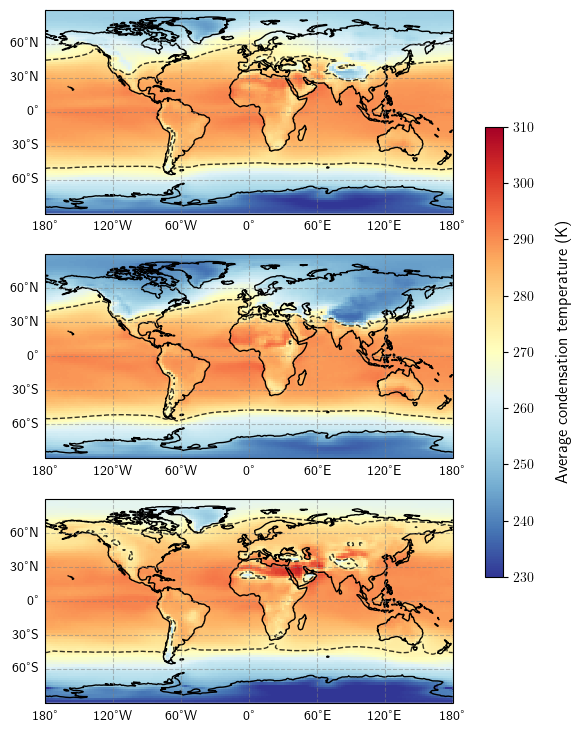

In [12]:
# Figure 6 - plots of Tcond: annual, DJF, and JJA

# now make the map plots:
fig = plt.figure(figsize=(9,9))

grid = gridspec.GridSpec(nrows = 3,
                        ncols = 1,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "RdYlBu_r"

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid

# upper panel: annual mean
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds.PRECTct.mean(dim="time").plot(ax = ax1,
                                  cmap = cmap,
                                  transform = ccrs.PlateCarree(),
                                  vmin = 230,
                                  vmax = 310, 
                                  add_colorbar = False)
ds.PRECTct.mean(dim="time").plot.contour(ax=ax1,  
                              levels = [273], 
                              colors = ['k'],
                              linewidths = [1],
                              linestyles = ["--"],
                              alpha = 0.8)

# middle panel: DJF
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_weighted['PRECTct'].sel(season='DJF').plot(ax = ax2,
                                               cmap = cmap,
                                               transform = ccrs.PlateCarree(),
                                               vmin = 230,
                                               vmax = 310, 
                                               add_colorbar = False)
ds_weighted['PRECTct'].sel(season='DJF').plot.contour(ax=ax2,  
                              levels = [273], 
                              colors = ['k'],
                              linewidths = [1],
                              linestyles = ["--"],
                              alpha = 0.8)

# bottom panel: JJA
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im = ds_weighted['PRECTct'].sel(season='JJA').plot(ax = ax3,
                                               cmap = cmap,
                                               transform = ccrs.PlateCarree(),
                                               vmin = 230,
                                               vmax = 310, 
                                               add_colorbar = False)
ds_weighted['PRECTct'].sel(season='JJA').plot.contour(ax=ax3,  
                              levels = [273], 
                              colors = ['k'],
                              linewidths = [1],
                              linestyles = ["--"],
                              alpha = 0.8)



fig.subplots_adjust(right=0.95, wspace=0.02, hspace=0.2)
cb_ax = fig.add_axes([0.80, 0.25, 0.02, 0.5])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("Average condensation temperature (K)", size = 'large', labelpad = 15)

ax1.set_title('')
ax2.set_title('')
ax3.set_title('')

#plt.tight_layout()
plt.draw()
#plt.savefig('plots/fig08.png',dpi=dpi_out,bbox_inches='tight')

In [13]:
# get some statistics on T_cond
#ds.PRECTct.mean(dim='time').min()
#ds.PRECTct.mean(dim='time').max()
#ds_weighted['PRECTct'].sel(season='JJA').max()
ds_weighted

<xarray.Dataset>
Dimensions:         (lon: 180, lat: 90, season: 4)
Coordinates:
  * lon             (lon) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat             (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * season          (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables: (12/30)
    PRECT           (season, lat, lon) float64 ...
    PRECT_d18O      (season, lat, lon) float64 ...
    PRECT_d18Oec    (season, lat, lon) float64 ...
    PRECT_d2H       (season, lat, lon) float64 ...
    PRECT_dxs       (season, lat, lon) float64 ...
    PRECTct         (season, lat, lon) float64 ...
    ...              ...
    qonp            (season, lat, lon) float64 ...
    PRECTedxs       (season, lat, lon) float64 ...
    dxs_diff        (season, lat, lon) float64 ...
    d18O_anom_norm  (season, lat, lon) float64 ...
    RT_anom_norm    (season, lat, lon) float64 ...
    qonp_anom_norm  (season, lat, lon) float64 ...

<Figure size 900x900 with 0 Axes>

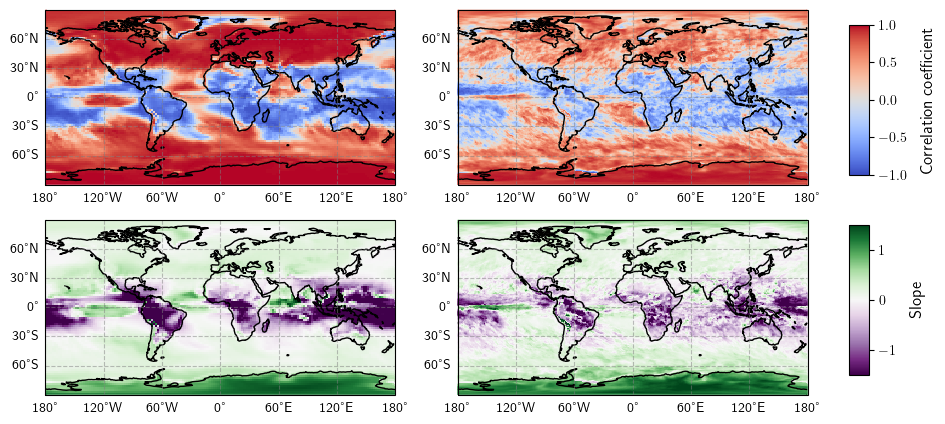

In [14]:
# Figure 9 - correlations between T_cond and d'18O, slopes of relationship between d18O and D18O.

# now make the map plots:
fig = plt.figure(figsize=(9,9))

# now make the map plots:
fig = plt.figure(figsize=(10,5))

grid = gridspec.GridSpec(nrows = 2,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap1 = "coolwarm"
cmap2 = 'PRGn'

# Add the subplots
ax2 = fig.add_subplot(grid[0], projection=proj) # upper right cell of grid
ax3 = fig.add_subplot(grid[1], projection=proj) # lower left cell of grid
ax5 = fig.add_subplot(grid[2], projection=proj) # lower left cell of grid
ax6 = fig.add_subplot(grid[3], projection=proj) # lower right cell of grid

# upper panel: correlation between d'18O and ln(f)
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(monthly_avr.PRECTct,monthly_avr.PRECT_d18O,dim="month").plot(ax = ax2,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1,
                                  add_colorbar = False)

# upper panel: correlation between d'18O and ln(f)
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(ds_ann.PRECTct,ds_ann.PRECT_d18O,dim="time").plot(ax = ax3,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1,
                                  add_colorbar = False)

# middle panel: correlation between d'18O and ln(f)
# plot slope between lnf and d18O at different places
def linear_trend(x,y):
    pf = np.polyfit(x,y,1)
    # need to return a dataarray (is this neeeded?)
    return xr.DataArray(pf[0])

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       monthly_avr.PRECTct, monthly_avr.PRECT_d18O,
                       vectorize = True,
                       input_core_dims = [['month'], ['month']],)

slopes = slopes

# average slope of d18O vs lnf
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = slopes.plot(ax=ax5,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1.5, vmax = 1.5,
            add_colorbar = False)

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds_ann.PRECTct,ds_ann.PRECT_d18O,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)

slopes = slopes

# average slope of d18O vs lnf
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
slopes.plot(ax=ax6,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1.5, vmax = 1.5,
            add_colorbar = False)


fig.subplots_adjust(right = 0.93, wspace=0.05)
cb1_ax = fig.add_axes([0.95, 0.55, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax = cb1_ax)
cbar1.set_label("Correlation coefficient", size = 'large', labelpad = 10)

cb2_ax = fig.add_axes([0.95, 0.15, 0.02, 0.3]) 
cbar2 = fig.colorbar(im2, cax = cb2_ax)
cbar2.set_label(r'Slope', size = 'large', labelpad = 10)

#plt.savefig('plots/fig09.png',dpi=dpi_out,bbox_inches='tight')
plt.show()

### Extra plots

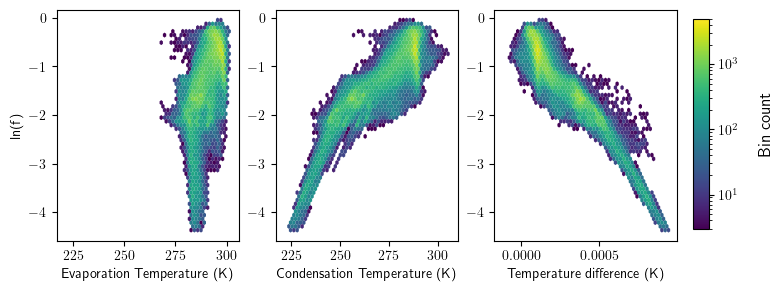

In [15]:
# fig 13: scatter plots between d-excess, T, RH, ws
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(8,3))

monthly_avr['Tdiff'] = 1/monthly_avr['PRECTct'] - 1/monthly_avr['PRECTtsrf']

#ds_p1.plot.scatter('mean_RH','mean_dxs',ax=axes[0])
#ax1.set(ylim=(-60,10))
#ax2.set(ylim=(-60,10))
#ax3.set(ylim=(-60,10))

ax1.hexbin('PRECTtsrf','PRECTlnf',data=monthly_avr,
           mincnt=3, gridsize = 50,
           linewidths = 0.01,
           #extent = (20,80,0,30),
           norm = mpl.colors.LogNorm(3,5000))
ax1.set_xlabel('Evaporation Temperature (K)')
ax1.set_ylabel('ln(f)')
#ds_p1.plot.scatter('mean_T','mean_dxs',ax=axes[1])
ax2.hexbin('PRECTct','PRECTlnf', data = monthly_avr, 
           mincnt = 3, gridsize = 50,
           linewidths = 0.01,
           #extent = (260, 310, 0, 30),
           norm = mpl.colors.LogNorm(3,5000))
ax2.set_xlabel('Condensation Temperature (K)')
#ds_p1.plot.scatter('mean_ews','mean_dxs',ax=axes[2])
hb = ax3.hexbin('Tdiff','PRECTlnf', data=monthly_avr, 
           mincnt=3, gridsize = 50,
           linewidths = 0.01,
           #extent = (2,12,0,30),
           norm = mpl.colors.LogNorm(3,5000))
ax3.set_xlabel('Temperature difference (K)')

# add a colorbar
fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92,0.15,0.02,0.7])
cbar = fig.colorbar(hb, cax = cbar_ax)
cbar.set_label('Bin count', size = 'large', labelpad = 15)

#plt.tight_layout()
plt.draw()
#plt.savefig('plots/Temp_lnf_comp.png',dpi=dpi_out,bbox_inches='tight')

Text(0.5, 0, 'Condensation T')

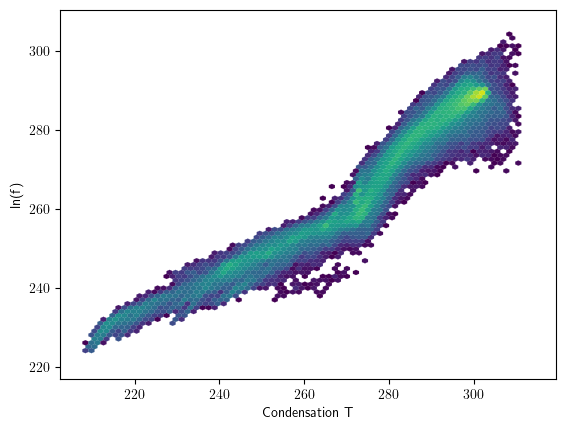

In [16]:
fig, ax1 = plt.subplots(1,1)

ax1.hexbin('TS', 'PRECTct',
                data = monthly_avr, mincnt = 5,
                gridsize = 75, norm=mpl.colors.LogNorm(5,10000),
                linewidths = 0.1)
# add constant fractionation line
#ax1.plot([-5,0],[-0.05,0],'k-',color = 'r')
# add x and y axis labels
ax1.set_ylabel('ln(f)')
ax1.set_xlabel('Condensation T')

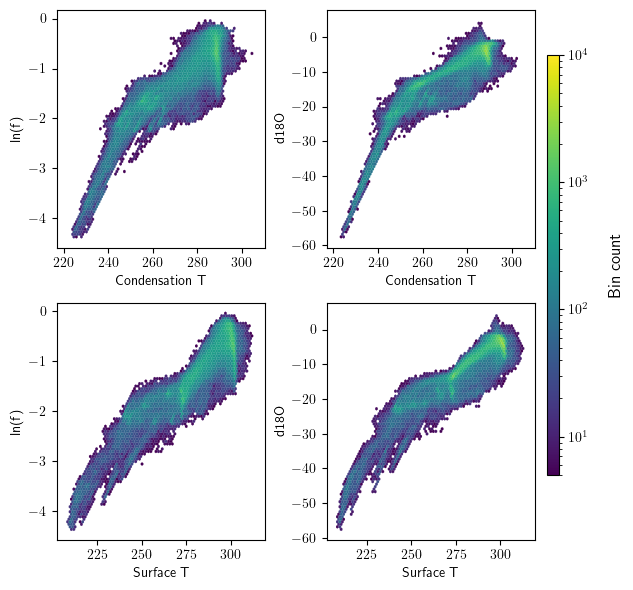

In [17]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize = (6,6))

# uncorrected d18O
#ax1.set(xlim=(-5,0), ylim=(-0.07,0.01))
hb = ax1.hexbin('PRECTct', 'PRECTlnf',
                data = monthly_avr, mincnt = 5,
                gridsize = 75, norm=mpl.colors.LogNorm(5,10000),
                linewidths = 0.1)
# add constant fractionation line
#ax1.plot([-5,0],[-0.05,0],'k-',color = 'r')
# add x and y axis labels
ax1.set_ylabel('ln(f)')
ax1.set_xlabel('Condensation T')

# uncorrected d18O
#ax1.set(xlim=(-5,0), ylim=(-0.07,0.01))
hb = ax2.hexbin('PRECTct', 'PRECT_d18O',
                data = monthly_avr, mincnt = 5,
                gridsize = 75, norm=mpl.colors.LogNorm(5,10000),
                linewidths = 0.1)
# add constant fractionation line
#ax1.plot([-5,0],[-0.05,0],'k-',color = 'r')
# add x and y axis labels
ax2.set_ylabel('d18O')
ax2.set_xlabel('Condensation T')

# uncorrected d18O
#ax1.set(xlim=(-5,0), ylim=(-0.07,0.01))
hb = ax3.hexbin('TS', 'PRECTlnf',
                data = monthly_avr, mincnt = 5,
                gridsize = 75, norm=mpl.colors.LogNorm(5,10000),
                linewidths = 0.1)
# add constant fractionation line
#ax1.plot([-5,0],[-0.05,0],'k-',color = 'r')
# add x and y axis labels
ax3.set_ylabel('ln(f)')
ax3.set_xlabel('Surface T')

# uncorrected d18O
#ax1.set(xlim=(-5,0), ylim=(-0.07,0.01))
hb = ax4.hexbin('TS', 'PRECT_d18O',
                data = monthly_avr, mincnt = 5,
                gridsize = 75, norm=mpl.colors.LogNorm(5,10000),
                linewidths = 0.1)
# add constant fractionation line
#ax1.plot([-5,0],[-0.05,0],'k-',color = 'r')
# add x and y axis labels
ax4.set_ylabel('d18O')
ax4.set_xlabel('Surface T')

fig.tight_layout()
fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92,0.2,0.02,0.7])
cbar = fig.colorbar(hb, cax = cbar_ax)
cbar.set_label("Bin count", size = 'large', labelpad = 15)

#plt.tight_layout()
plt.draw()
#plt.savefig('ctemp_vs_lnf.png',dpi=dpi_out,bbox_inches='tight')


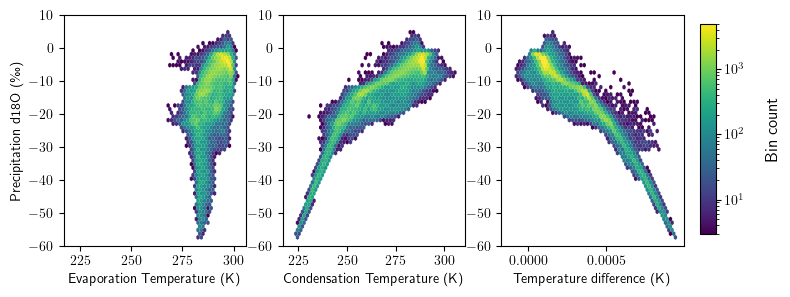

In [18]:
# fig 13: scatter plots between d-excess, T, RH, ws
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(8,3))

monthly_avr['Tdiff'] = 1/monthly_avr['PRECTct'] - 1/monthly_avr['PRECTtsrf']

#ds_p1.plot.scatter('mean_RH','mean_dxs',ax=axes[0])
ax1.set(ylim=(-60,10))
ax2.set(ylim=(-60,10))
ax3.set(ylim=(-60,10))

ax1.hexbin('PRECTtsrf','PRECT_d18O',data=monthly_avr,
           mincnt = 3, gridsize = 50,
           linewidths = 0.01,
           #extent = (20,80,0,30),
           norm = mpl.colors.LogNorm(3,5000))
ax1.set_xlabel('Evaporation Temperature (K)')
ax1.set_ylabel('Precipitation d18O (‰)')
#ds_p1.plot.scatter('mean_T','mean_dxs',ax=axes[1])
ax2.hexbin('PRECTct','PRECT_d18O', data = monthly_avr, 
           mincnt = 3, gridsize = 50,
           linewidths = 0.01,
           #extent = (260, 310, 0, 30),
           norm = mpl.colors.LogNorm(3,5000))
ax2.set_xlabel('Condensation Temperature (K)')
#ds_p1.plot.scatter('mean_ews','mean_dxs',ax=axes[2])
hb = ax3.hexbin('Tdiff','PRECT_d18O', data=monthly_avr, 
           mincnt = 3, gridsize = 50,
           linewidths = 0.01,
           #extent = (2,12,0,30),
           norm = mpl.colors.LogNorm(3,5000))
ax3.set_xlabel('Temperature difference (K)')

# add a colorbar
fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92,0.15,0.02,0.7])
cbar = fig.colorbar(hb, cax = cbar_ax)
cbar.set_label('Bin count', size = 'large', labelpad = 15)

#plt.tight_layout()
plt.draw()
##plt.savefig('plots/Temp_d18O_comp.png',dpi=dpi_out,bbox_inches='tight')